In [1]:
# Import basic library every time in ml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#To load dataset bank.csv
df=pd.read_csv("heart.csv")
# to display first 5 records
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# to check how many rows and columns in our dataset
df.shape

(303, 14)

In [4]:
# check datset is balanced or not
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

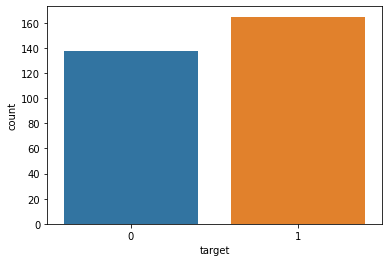

In [5]:
# visualize
sns.countplot(df["target"])
plt.show()

In [6]:
# to check null values in dataset
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
#To check datatype
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [8]:
X=df.drop("target",axis=1)
Y=df["target"]

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
# Create object of train test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,stratify=Y,random_state=1)

In [11]:
# Standardization
from sklearn.preprocessing import StandardScaler
#fit_transform on training data X_train and 
#transform on testing_data means X_test :
#create object of StandardScaler class
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [12]:
#Dataset is a classification dataset , we predict customer will churn or not
#First Baseline model : 
#create a function 
def create_model(model):
    model.fit(X_train,Y_train)#train the model
    Y_pred=model.predict(X_test) #test
    print(classification_report(Y_test,Y_pred))
    print("Confusion Matrix : ")
    #Confusion matrix
    print(confusion_matrix(Y_test,Y_pred))
    return model

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [14]:
#Base Line Model means use Logistic Regression(we predict yes/no values then 
#use classification algorithm)
from sklearn.linear_model import LogisticRegression

In [15]:
# Create the object of Logistic Regression
lr=LogisticRegression()

In [16]:
# call function
lr=create_model(lr)

              precision    recall  f1-score   support

           0       0.85      0.83      0.84        41
           1       0.86      0.88      0.87        50

    accuracy                           0.86        91
   macro avg       0.86      0.85      0.86        91
weighted avg       0.86      0.86      0.86        91

Confusion Matrix : 
[[34  7]
 [ 6 44]]


In [17]:
# decision Tree classifier algorithm
# pruning Technique
# randomForestClassifier
# apply ada boost on given dataset

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
#1. max_depth parameter  
##create object of DecisionTreeClassifier class
dt1=DecisionTreeClassifier(max_depth=5)
#Note : max_depth can not more than 8
#by default use method : gini index

In [20]:
# train the model
dt1=create_model(dt1)

              precision    recall  f1-score   support

           0       0.78      0.76      0.77        41
           1       0.80      0.82      0.81        50

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91

Confusion Matrix : 
[[31 10]
 [ 9 41]]


In [21]:
# create the tree
from sklearn import tree
features=X.columns
fig=plt.figure(figsize=(20,20))
#_=tree.plot_tree(dt1,feature_names=features,filled=True)

<Figure size 1440x1440 with 0 Axes>

In [22]:
IG=dt1.feature_importances_

In [23]:
columns=X.columns
# create a dictionary
dic={"Input":columns,"information_gain":IG}
df1=pd.DataFrame(dic)
df1.sort_values("information_gain",ascending=False)# decendign

,Input,information_gain
2,cp,0.330363
11,ca,0.126789
9,oldpeak,0.126086
7,thalach,0.081185
10,slope,0.079198
4,chol,0.074621
12,thal,0.071520
3,trestbps,0.048404
6,restecg,0.041066
0,age,0.020769


In [24]:
#2nd purning technique : min_samples_leaf
#min_samples_leaf =50 or more means not less than=50
##create object of DecisionTreeClassifier class
dt2=DecisionTreeClassifier(min_samples_leaf=50)

In [25]:
# call function (train the model)
dt2=create_model(dt2)

              precision    recall  f1-score   support

           0       0.69      0.83      0.76        41
           1       0.83      0.70      0.76        50

    accuracy                           0.76        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.77      0.76      0.76        91

Confusion Matrix : 
[[34  7]
 [15 35]]


In [26]:
IG=dt2.feature_importances_
columns=X.columns
# create a dictionary
dic={"Input":columns,"information_gain":IG}
df2=pd.DataFrame(dic)
df2.sort_values("information_gain",ascending=False)# decendign

,Input,information_gain
2,cp,0.878735
7,thalach,0.121265
0,age,0.000000
1,sex,0.000000
3,trestbps,0.000000
4,chol,0.000000
5,fbs,0.000000
6,restecg,0.000000
8,exang,0.000000
9,oldpeak,0.000000


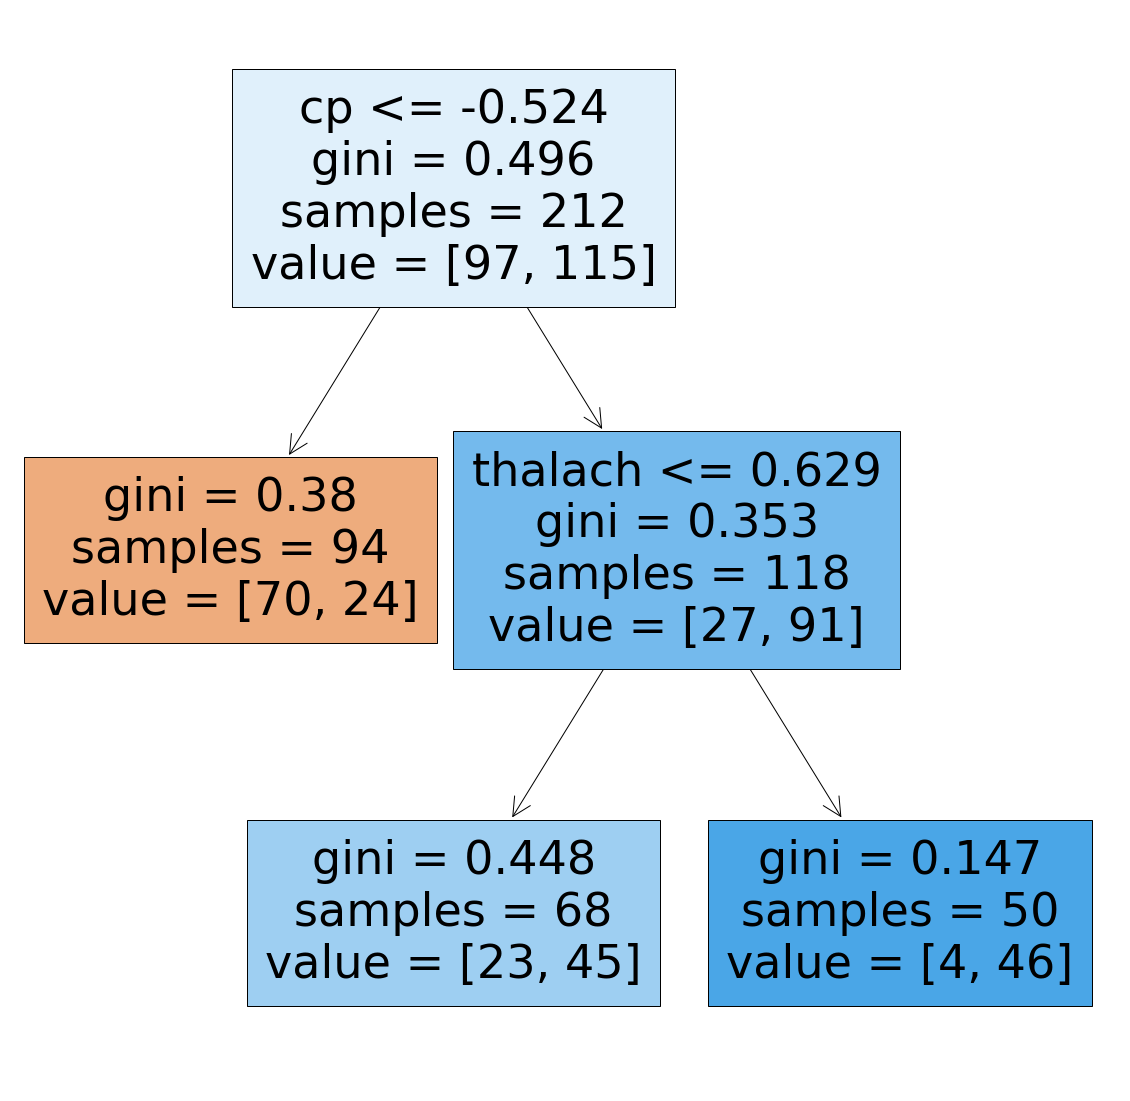

In [27]:
# create the tree
from sklearn import tree
features=X.columns
fig=plt.figure(figsize=(20,20))
_=tree.plot_tree(dt2,feature_names=features,filled=True)

# ada boost classifier

In [28]:
from sklearn.ensemble import AdaBoostClassifier 

In [29]:
# create the object of AdaBoostClassifier  class
ada=AdaBoostClassifier (n_estimators=4)
# n_estimators can be <=100

In [30]:
# call function
ada=create_model(ada)

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        41
           1       0.91      0.86      0.89        50

    accuracy                           0.88        91
   macro avg       0.88      0.88      0.88        91
weighted avg       0.88      0.88      0.88        91

Confusion Matrix : 
[[37  4]
 [ 7 43]]


In [31]:
IG=ada.feature_importances_

In [32]:
columns=X.columns
# create a dictionary
dic={"Input":columns,"information_gain":IG}
df1=pd.DataFrame(dic)
df1.sort_values("information_gain",ascending=False)# decendign

,Input,information_gain
2,cp,0.25
9,oldpeak,0.25
11,ca,0.25
12,thal,0.25
0,age,0.00
1,sex,0.00
3,trestbps,0.00
4,chol,0.00
5,fbs,0.00
6,restecg,0.00


# gradient boost

In [33]:
#Gradient Boosting : - 
#2. Gradient Boosting(GB) : - 
#Its basically focus on short comings error  means fully grown tree 
#error means residual =actual output-predicted output

#2. gradient Boost technuique : second tech. of Boosting Ensembling technique 
# GB  : - its create a fully grown tree.this algorithm is focus on short comings 
#short comings means error

In [34]:
#call GradientBoostingClassifier class from following package
from sklearn.ensemble import GradientBoostingClassifier

In [35]:
# create the object of GradientBoostClassifier class
gbc=GradientBoostingClassifier(n_estimators=21,random_state=1)
#n_estimators should be<=100 bydefault algorithm decisiontreeclassifier

In [36]:
# call function
gbc=create_model(gbc)

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        41
           1       0.84      0.84      0.84        50

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91

Confusion Matrix : 
[[33  8]
 [ 8 42]]


In [37]:
#3. Extreame Gradient Boosting  : 3rd technique of Boosting 
#This is better version of gradient boosting . . short form XGB 
#why call better version of Gradient Boosting : -
#1. XG Bossting use : - Multithreading technique
#2. It takes less memory space and faster 
#3. It is very useful to handle huge amt of data .Its deal large amount of data
#4. Its handle outlier because have inbuilt capability
#5. Its handle null values 
#6. Its handle automatic overfitting situation .

In [38]:
#install the external package from python's community first for XGBoost
#!pip install xgboost

In [39]:
from xgboost import XGBClassifier

In [40]:
# create the object of GradientBoostClassifier class
xgc=XGBClassifier(n_estimators=10,reg_alpha=1,random_state=1)
#n_estimators should be<=100 bydefault algorithm decisiontreeclassifier
# automatic overfitting : reg means regularization and alfa or lambda: hyperparameter

In [41]:
# call function
xgc=create_model(xgc)

              precision    recall  f1-score   support

           0       0.77      0.83      0.80        41
           1       0.85      0.80      0.82        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91

Confusion Matrix : 
[[34  7]
 [10 40]]


In [42]:
IG=xgc.feature_importances_

In [43]:
columns=X.columns
# create a dictionary
dic={"Input":columns,"information_gain":IG}
df1=pd.DataFrame(dic)
df1.sort_values("information_gain",ascending=False)# decendign

,Input,information_gain
2,cp,0.277599
12,thal,0.157658
11,ca,0.130745
10,slope,0.104469
8,exang,0.076071
1,sex,0.058059
7,thalach,0.053963
9,oldpeak,0.050767
0,age,0.021736
5,fbs,0.019963


# ada boost is giving the best accuracy i.e 0.88

# building the predctive model

In [47]:
input_data=(41,0,1,130,204,0,0,172,0,1.4,2,0,2)
# change the input data to a numpy array
input_data_array=np.asarray(input_data)
# reshape the numpy array as we are predicting for only one instance
input_data_reshape= input_data_array.reshape(1,-1)
prediction=lr.predict(input_data_reshape)
if prediction==0:
    print("the person is not having any heart diseases")
else:
    print("the person is having heart diseases")

the person is having heart diseases
